In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

bitcoin_data = pd.read_csv("C:\\Users\\Aaron\\Dropbox\\CSC767\\HW2\\BitcoinHeistData.csv")

### Attribute Information:

Features

address: String. Bitcoin address.

year: Integer. Year.

day: Integer. Day of the year. 1 is the first day, 365 is the last day.

length: Integer.

weight: Float.

count: Integer.

looped: Integer.

neighbors: Integer.

income: Integer. Satoshi amount (1 bitcoin = 100 million satoshis).

label: Category String. Name of the ransomware family (e.g., Cryptxxx, cryptolocker etc) or white (i.e., not known to be ransomware).

Our graph features are designed to quantify specific transaction patterns. 
1. Loop is intended to count how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address. Coins at this final address can then be sold and converted to fiat currency. 
2. Weight quantifies the merge behavior (i.e., the transaction has more input addresses than output addresses), where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address. 
3. Similar to weight, the count feature is designed to quantify the merging pattern. However, the count feature represents information on the number of transactions, whereas the weight feature represents information on the amount (what percent of these transactionsâ€™ output?) of transactions. 
4. Length is designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin.

White Bitcoin addresses are capped at 1K per day (Bitcoin has 800K addresses daily). 

In [2]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [3]:
bitcoin_data.label.value_counts()

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealGlobeImposter               55
montrealCryptoTorLocker2015         55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealCryptConsole                 7
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

In [4]:
# I've created a bitcoin_mod data frame that copies all of the data from bitcoin_data so that we can make
# modifications to the data without altering the original dataset. The reason I did this is so that we can modify
# the mod set for data analysis and exploration and then when we are finished and sufficiently satisfied with
# what the data has shown us, then we can make modifications to the original data set so that we can then use the
# original data set for the models.
bitcoin_mod = bitcoin_data
bitcoin_mod.label.replace(['white','paduaCryptoWall','montrealCryptoLocker', 'princetonCerber',
                           'princetonLocky','montrealCryptXXX','montrealNoobCrypt','montrealDMALockerv3','montrealDMALocker',
                           'montrealSamSam','montrealCryptoTorLocker2015','montrealGlobeImposter','montrealGlobev3','montrealGlobe',
                           'montrealWannaCry','montrealRazy','montrealAPT','paduaKeRanger','montrealFlyper','montrealXTPLocker',
                           'montrealVenusLocker','montrealXLockerv5.0','montrealCryptConsole','montrealEDA2','montrealJigSaw',
                           'paduaJigsaw','montrealComradeCircle','montrealSam','montrealXLocker'],
                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], inplace = True)

In [5]:
bitcoin_mod.year.value_counts()
# the year ranges from 2011 to 2018. Year could be useful because 
#it can signify when the ransomeware's were the most active

2016    380631
2014    375319
2013    372494
2015    368701
2017    368486
2012    365714
2011    355349
2018    330003
Name: year, dtype: int64

In [6]:
bitcoin_mod.sample(20)

,address,year,day,length,weight,count,looped,neighbors,income,label
2200983,16n1sZbPhL7i2dQVGoToqB7vJ8dBqVrCdX,2016,345,0,3.000000,3,0,3,2.267703e+08,0
546943,1GzqzsWAzVhXxWAzhEpzU2G6pcnuq5sbCJ,2012,151,0,0.500000,1,0,2,7.256200e+08,0
2289330,1NMNfmWcKqQrrf7wCAq1uMKoxyMK7QjUD8,2017,68,0,1.000000,1,0,1,3.298746e+07,0
447451,13jwE7mdjRZusVECHJR2ju1ajDNqcQcWEY,2012,51,0,0.026316,1,0,1,4.231619e+07,0
2021142,1A8o3ihHREnkcqQnM37LUXjrYtJMqRNas3,2016,165,10,0.500000,1,0,2,7.668557e+08,0
945518,1Lis1eVCJjXdCBo3f8m3H1RmwTXuaMBQPj,2013,184,14,0.250000,1,0,2,5.020000e+08,0
1451669,1MTF8nwfLShgTyxpgmzY2SzZA2z5DLAu6M,2014,325,28,0.004780,10,10,5,3.080586e+09,0
1624442,1LHdrwVXLCeS4eQT9zCPwcFLG7ZHNiWSWz,2015,133,12,0.062500,1,0,1,1.357340e+09,0
2842310,37VKGDb4wTBaLU2z8HhhFvNLpLUVGnonui,2018,256,144,4.019501,5493,0,2,1.519060e+09,0
634063,15DxMxnPSKyf3U7dUDztKjLZQiDPsY34VW,2012,238,0,1.000000,1,0,1,2.963900e+08,0


The questions I have so far about the data are now:
1. Does address have an impact on whether or not the label is ransomware or not?
2. Since we have year and day of the year, does this data show us when specific ransomwares were highly active? e.g. if in year 2012 from days 50-65 we had a 15 day window of ransomware A that was active, but throughout the rest of the data set, ransomeware A is not present. This would indicate to us that ransomeware A was a very short lived type of ransomeware and thus our MLP will know that the odds of ransomware A being active are very low. Versus if we have a ransomeware that keeps popping up throughout the years and days, let's call this ransomware B, and say in 2020, if we see patterns and behaviors of ransomware activity, we can be somewhat safe in classifiying the ransomware activity as ransomeware B since it's highly active and has appeared in the data sets multiple times and did not disappear. Kind of like the flu vs a one time disease that quickly died out. 
3. How does loop and count fit into the equation?

In [7]:
bitcoin_mod.describe()

,year,day,length,weight,count,looped,neighbors,income,label
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09,3.745950e-02
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11,3.755814e-01
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07,0.000000e+00
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07,0.000000e+00
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08,0.000000e+00
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08,0.000000e+00
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13,2.800000e+01


In [8]:
bitcoin_mod.address.value_counts()

1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU    420
16cVG72goMe4sNqZhnpmnqfCMZ1uSFbUit    261
12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza    207
12YursV58dRT2c9iuZg3jEWfwgTDamBcnd    183
1LEq4WmpCrqBd7V3PywE2nvFUFC3QTe52x    176
                                     ... 
1AKyDHjvpv6KHi58jo1BFPiohkbNVx4C9j      1
15cuVA32hQiwiVEBYc6peHMmesSyvf4oyz      1
1AxLMXmL488bbxZrcobAZFbtExHEcmJopy      1
19e5YbgWWjmETD61M7JYjkZSkqEpjpuPgH      1
1KYf2eEpMwwaR94tbt5QFUxQsnVzGJ7ZRS      1
Name: address, Length: 2631095, dtype: int64

### Histogram Plots to see if we can get some insight from visualizing the data

<ipython-input-9-79bd73b27dd9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  bitcoin_mod.hist(ax = ax)


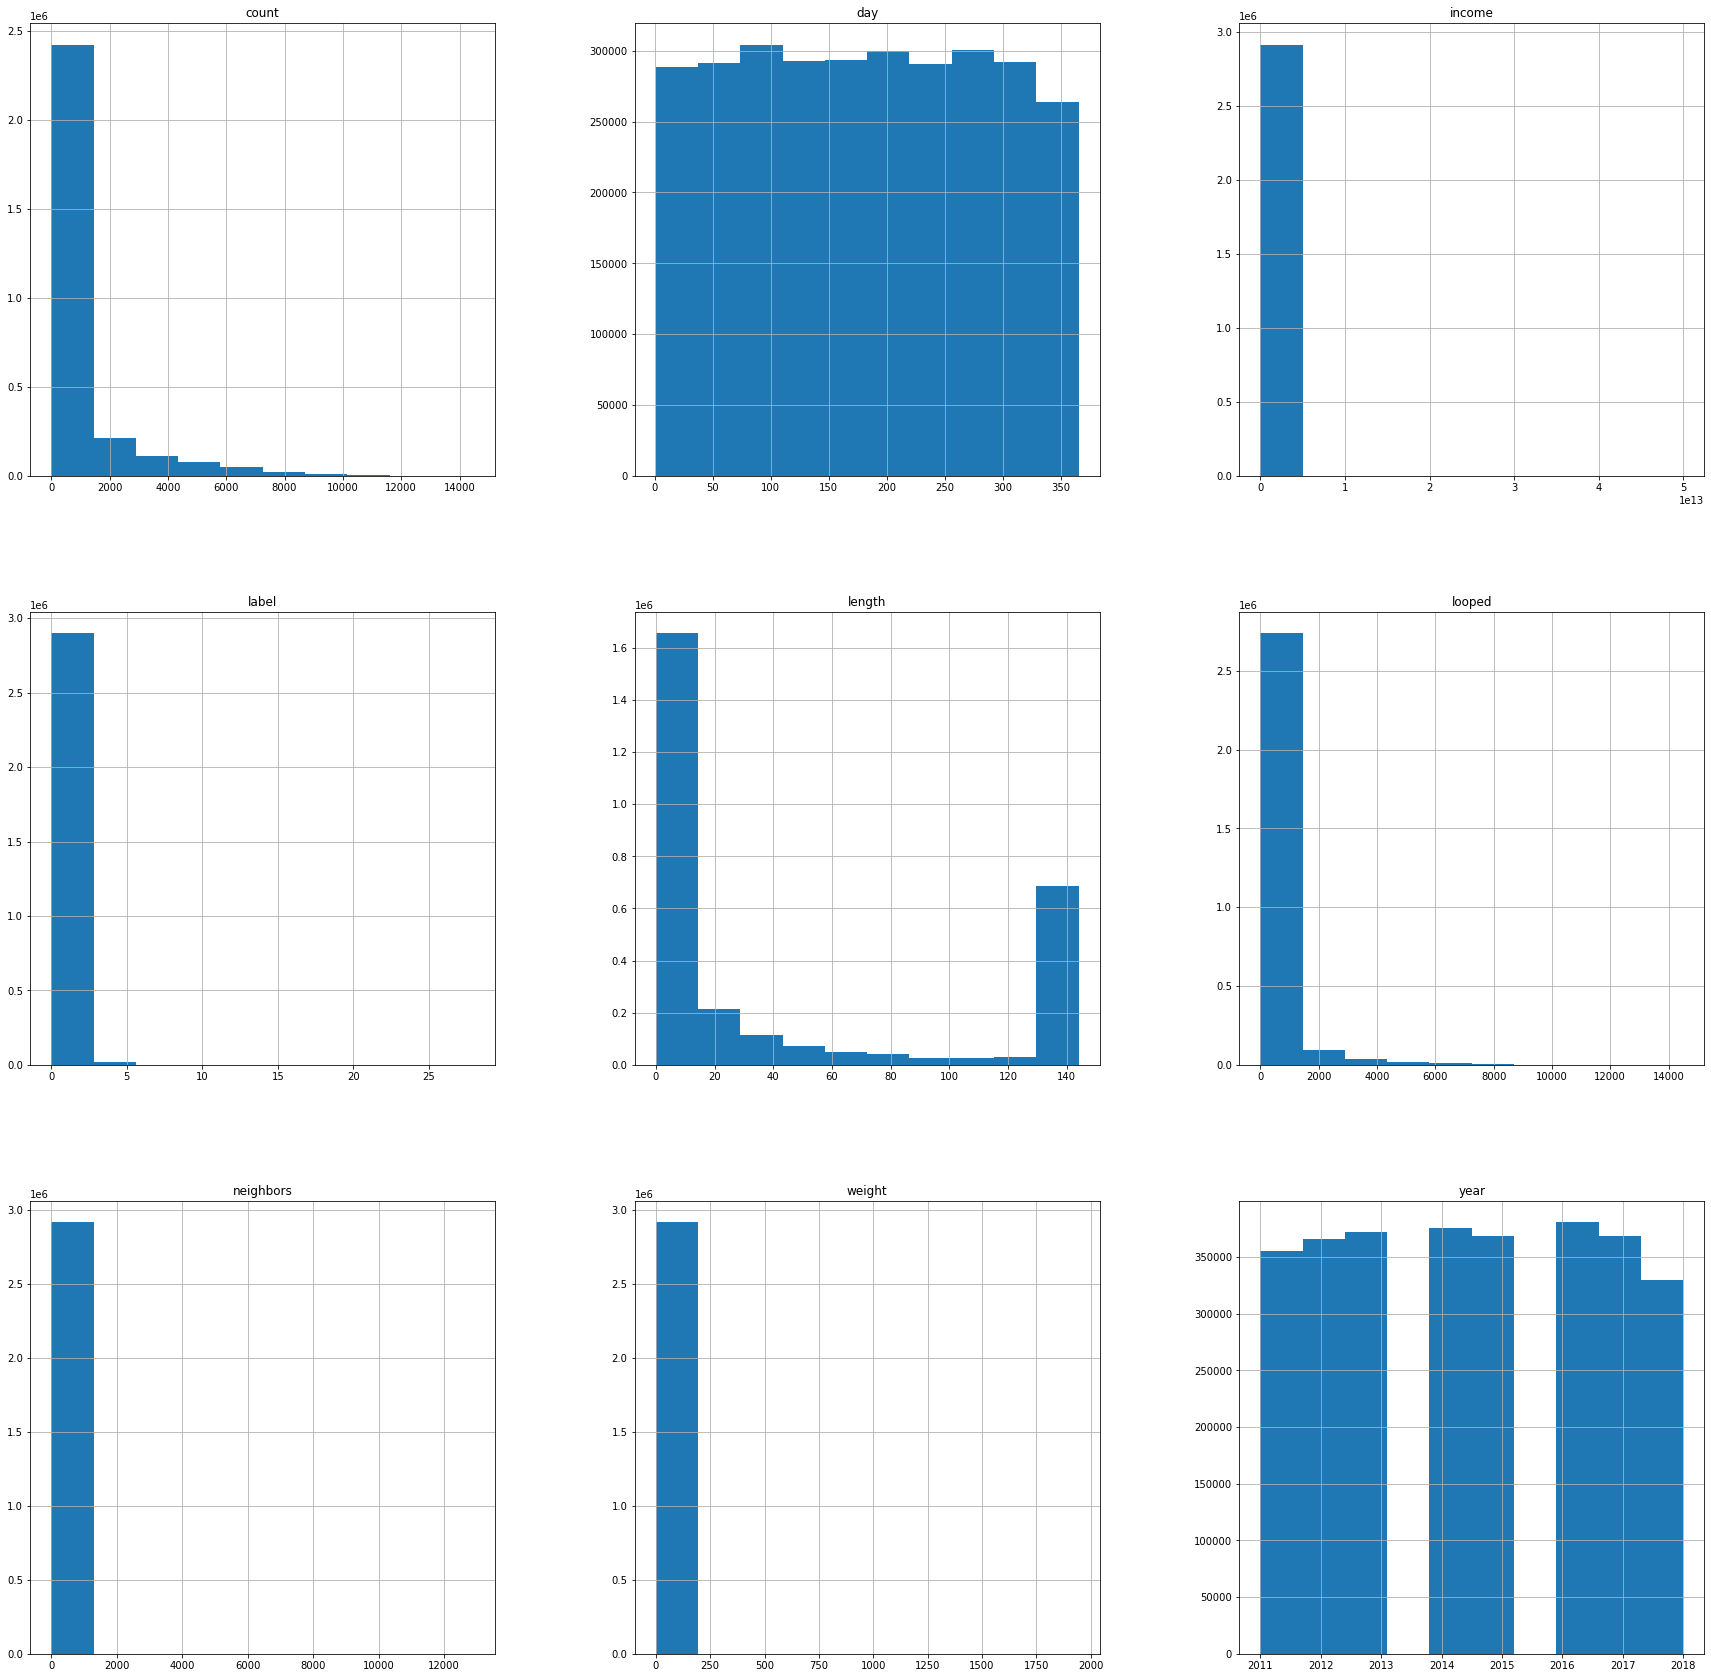

In [9]:
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
bitcoin_mod.hist(ax = ax)
plt.show()

### Insights from the histogram plot:
1. We will need to normalize the data as the scale for each of the feature columns varies insanely
2. As seen previously, there are a lot of White/0s for the labels, meaning that there aren't as many ransomware attacks, so we should expect for our MLP to predict a lot of Whites/0s.
3. It can be safe to assume that very high length is correlated to ransomeware.
4. Moving forward, I think it would be wise to remove the address column as it might not be fully useful.

In [13]:
bitcoin_mod.drop(['address'], axis = 1,inplace = True)
# had issues with trying to get dummies for address, maybe you guys can work something out? I tried one hot encoding,
# but didn't get too far with it either.

### PCA part

In [14]:
# first we'll need to normalize the dataset
from sklearn import preprocessing
normal = bitcoin_mod.drop('label', axis = 1)
normalized_bitcoin_mod = preprocessing.normalize(normal)
normalized_bitcoin_mod

array([[2.01599200e-05, 1.09945027e-07, 1.79910045e-07, ...,
        0.00000000e+00, 1.99900050e-08, 1.00000000e+00],
       [2.01600000e-05, 1.32000000e-06, 4.40000000e-07, ...,
        0.00000000e+00, 1.00000000e-08, 1.00000000e+00],
       [1.00800000e-05, 1.23000000e-06, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e-08, 1.00000000e+00],
       ...,
       [8.41440823e-07, 1.37599342e-07, 8.33935405e-10, ...,
        2.50180621e-09, 1.45938696e-08, 1.00000000e+00],
       [1.13343616e-05, 1.85348827e-06, 0.00000000e+00, ...,
        0.00000000e+00, 5.61663111e-09, 1.00000000e+00],
       [1.79617267e-05, 2.93724966e-06, 1.28170894e-06, ...,
        0.00000000e+00, 1.78015131e-08, 9.99999998e-01]])

In [15]:
# Check and see the value of all 8 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
pca.fit(normalized_bitcoin_mod)
bitcoin_mod_pca = pca.transform(normalized_bitcoin_mod)
variance = np.var(bitcoin_mod_pca, axis = 0)
variance_ratio = variance/np.sum(variance)
print("Variance_ratio:",variance_ratio)
print("Pca.Components:",pca.components_)
print("Explained Varaince:",pca.explained_variance_)

Variance_ratio: [6.39926190e-01 2.73612592e-01 8.45366718e-02 1.64409748e-03
 2.80377312e-04 4.20912663e-08 2.80965177e-08 1.30515727e-09]
Pca.Components: [[ 4.10633817e-01  3.67607920e-02  2.67797043e-02  4.60552072e-05
   8.82223933e-01  2.25814444e-01  3.45289767e-04 -9.00115703e-05]
 [-9.06902177e-01 -8.42783852e-02 -1.60843793e-03 -2.32834148e-04
   3.94804103e-01  1.20632406e-01 -7.05062913e-04 -1.72380675e-05]
 [ 1.70604225e-02  3.34598264e-03 -1.38686632e-03  7.80617328e-06
  -2.55465157e-01  9.66660939e-01  6.24572644e-05 -3.72702428e-05]
 [-9.20263414e-02  9.95749585e-01  3.06331798e-03 -1.46113222e-05
   1.60647522e-03 -1.39355879e-03 -9.53801607e-05  2.11224229e-05]
 [ 1.21550159e-02  4.16709113e-03 -9.99625507e-01  3.45040920e-03
   2.33583503e-02  4.51001264e-03 -2.16856377e-03 -1.08413221e-03]
 [-8.00218621e-04  2.74996396e-05 -1.55569432e-03  1.72369782e-01
   3.56440626e-05 -4.36490855e-05  9.85020802e-01  4.42864243e-03]
 [-1.37539492e-04 -2.63319367e-05  3.77022509e-

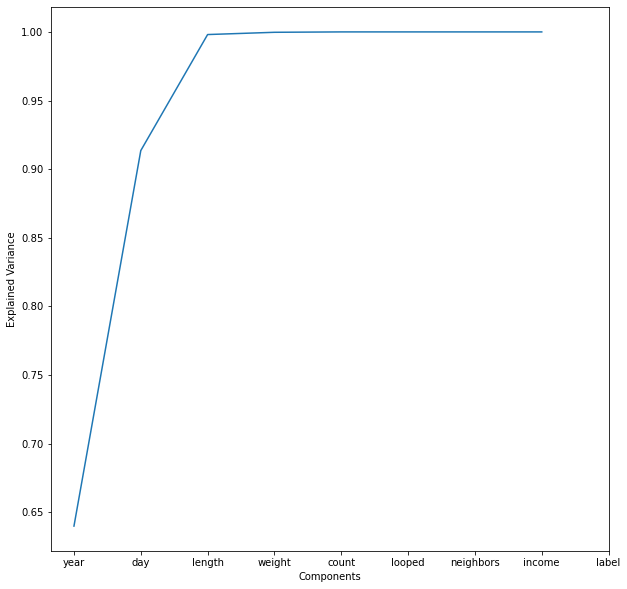

In [18]:
plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.xticks(range(bitcoin_mod.shape[1]), bitcoin_mod.columns)
plt.show()

The following plot shows us which features from our data set help to explain the most for our data. As we can see the most important ones that explain >90% of the data are year, day, and length and we can use these 3 for our MLP if we choose to get rid of any other features.

I used this as a reference to further understand what's going on. https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

Check it out as it will hlep you guys too.

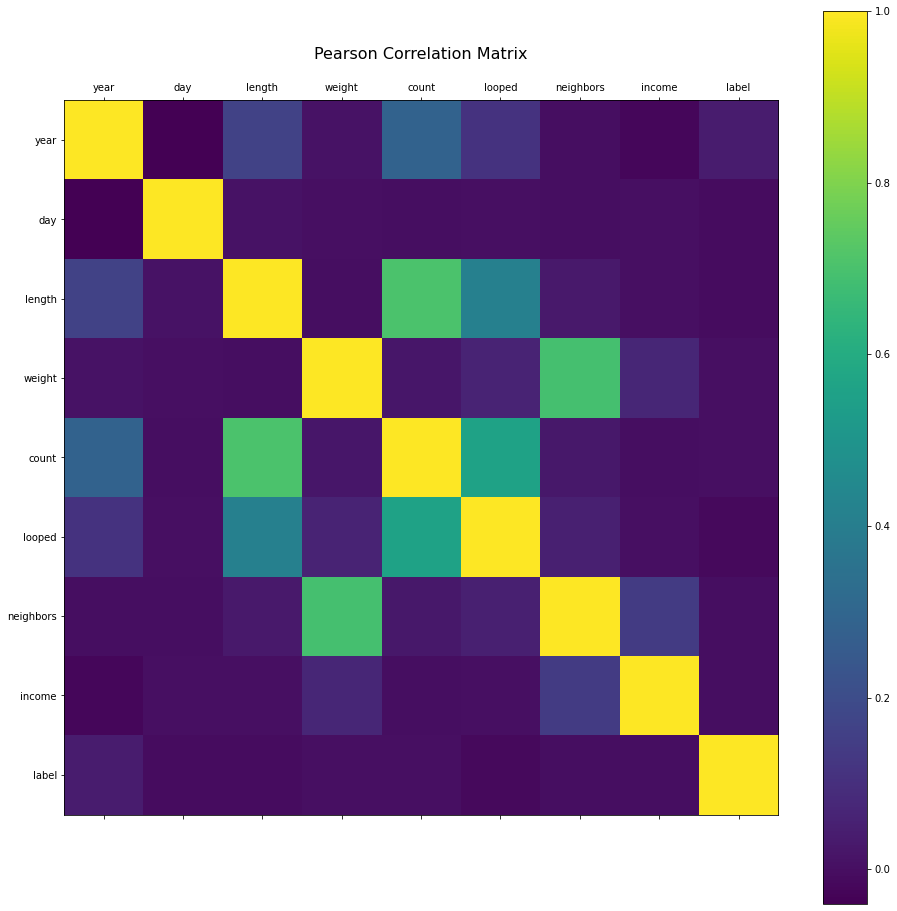

In [19]:
corr_matrix = bitcoin_mod.corr()
# plot of the pearson corr matrix as well so that we can also understand how the data correlates with labels
f = plt.figure(figsize=(16, 16))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(bitcoin_mod.shape[1]), bitcoin_mod.columns)
plt.yticks(range(bitcoin_mod.shape[1]), bitcoin_mod.columns)
cb = plt.colorbar()
plt.title('Pearson Correlation Matrix', fontsize=16);
plt.show()

Seems very odd that none of the data points are correlated with label but yet there is high correlation between themselves. 

In [20]:
corr_matrix

,year,day,length,weight,count,looped,neighbors,income,label
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535,0.039186
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628,-0.007463
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488,-0.005598
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774,0.001633
count,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635,0.000430
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551,-0.014766
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966,-0.001278
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000,-0.002151
label,0.039186,-0.007463,-0.005598,0.001633,0.000430,-0.014766,-0.001278,-0.002151,1.000000


Here I've plotted an easier to read corr_matrix to see the values and it's evident that there's barely any correlation between the label and the rest of the features. 